# Exploratory Analysis

In [1]:
from pandas import concat, DataFrame
from sklearn.cross_validation import train_test_split
from sklearn import ensemble

from context import *
from util.dfmgmt import initSet, wrangle
from util.polarize import sentiment
from util.plots import boxplotify, pairplotify, meanLine

## Plot characteristics and global variables

In [2]:
%matplotlib inline

## Import dataset

In [3]:
df = initSet()
df = df[df['decade'] != 2010]

In [4]:
# Check head
df.head(10)

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_term,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,rose,7,0,0,2.367848,0.9901,0
1,1961,1960,45,91,74,197,45,37,19,81,name,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,babi,10,0,0,3.885650,0.9974,1
3,1961,1960,42,148,66,263,81,61,36,76,love,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,come,38,0,0,2.940000,0.9812,1
5,1961,1960,50,105,79,181,39,40,24,80,mari,13,0,0,3.135470,0.9744,1
6,1961,1960,39,75,70,160,28,35,21,81,take,13,0,0,3.503750,0.9978,1
7,1961,1960,50,94,78,190,62,17,8,83,never,6,0,0,3.074737,-0.9791,1
8,1961,1960,53,63,92,166,25,41,18,105,one,4,0,0,4.993855,-0.2263,1
9,1961,1960,48,57,79,124,29,24,7,83,river,5,0,0,4.648387,-0.3400,1


## Basic Exploratory Analysis

In [5]:
# Basic descriptions of the distribution of the data
df.describe()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
count,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000
mean,1990.846555,1986.111691,61.002610,135.960334,93.400574,290.055063,65.162839,63.651618,21.690501,105.182933,15.267223,0.172495,1.165449,4.848724,0.448467,0.576722
std,13.434079,13.296060,35.334491,79.853909,45.509019,167.711712,43.881733,42.320593,17.618236,56.083971,13.407186,0.377859,4.904281,3.536340,0.750677,0.494143
min,1961.000000,1960.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-3.427959,-0.999700,0.000000
25%,1981.000000,1980.000000,40.000000,83.000000,66.000000,180.000000,36.000000,34.000000,10.000000,72.000000,7.000000,0.000000,0.000000,2.945868,-0.025800,0.000000
50%,1994.000000,1990.000000,53.000000,117.000000,84.000000,254.000000,54.000000,56.000000,17.000000,93.000000,12.000000,0.000000,0.000000,4.136718,0.926000,1.000000
75%,2002.000000,2000.000000,69.000000,164.000000,107.000000,352.000000,80.000000,83.000000,28.000000,120.000000,19.000000,0.000000,0.000000,5.707733,0.988100,1.000000
max,2009.000000,2000.000000,307.000000,638.000000,388.000000,1415.000000,376.000000,346.000000,205.000000,481.000000,234.000000,1.000000,88.000000,84.237399,0.999900,1.000000


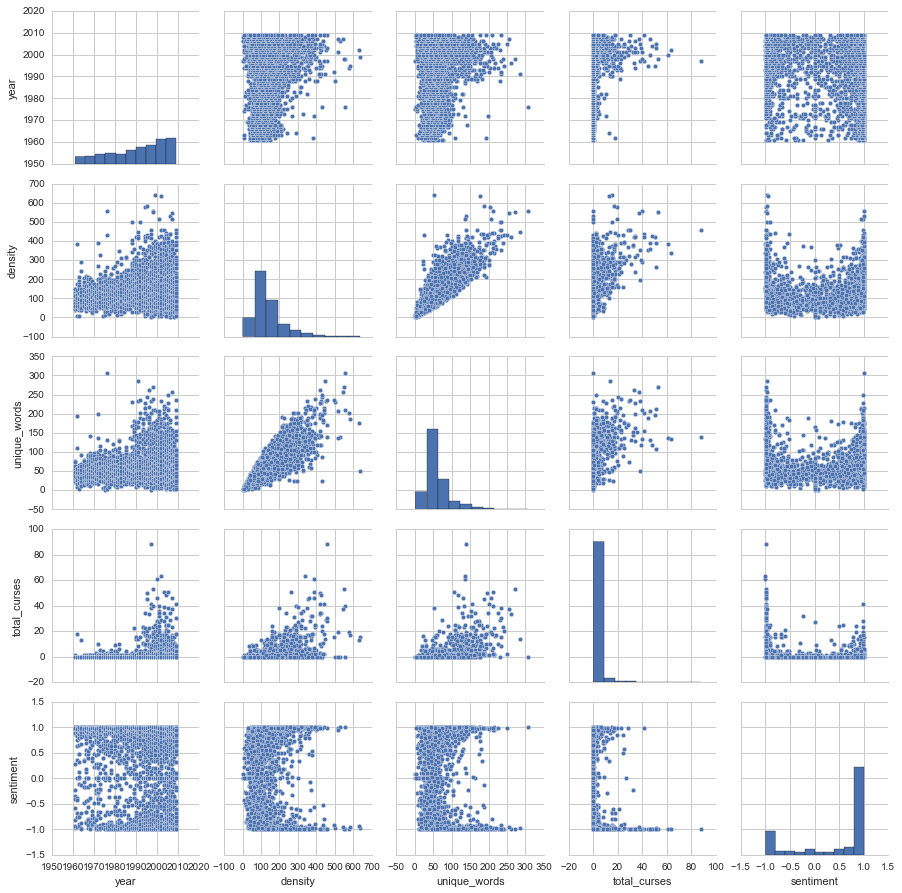

In [6]:
# # Get pair plot for major features of the dataset
pairplotify(
    df[
        ['year',
         'density',
         'unique_words',
         'total_curses', 
         'sentiment']
    ]
)

In [7]:
# Drop both year and decade
dropList = ['most_used_term']
removeList = ['decade', 'year', 'charted']

df, features = wrangle(df, dropList, removeList, True)

df['sentiment_polarity'] = df.apply(sentiment, axis=1)  # classify sentiment score
df.head(10)

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,explicit,total_curses,reading_score,sentiment,charted,sentiment_polarity
0,1961,1960,36,72,65,158,34,30,10,70,7,0,0,2.367848,0.9901,0,1
1,1961,1960,45,91,74,197,45,37,19,81,6,0,0,2.771777,0.9712,1,1
2,1961,1960,54,103,88,223,45,48,17,98,10,0,0,3.885650,0.9974,1,1
3,1961,1960,42,148,66,263,81,61,36,76,24,0,0,2.889886,0.9993,1,1
4,1961,1960,28,131,60,354,56,77,5,57,38,0,0,2.940000,0.9812,1,1
5,1961,1960,50,105,79,181,39,40,24,80,13,0,0,3.135470,0.9744,1,1
6,1961,1960,39,75,70,160,28,35,21,81,13,0,0,3.503750,0.9978,1,1
7,1961,1960,50,94,78,190,62,17,8,83,6,0,0,3.074737,-0.9791,1,-1
8,1961,1960,53,63,92,166,25,41,18,105,4,0,0,4.993855,-0.2263,1,0
9,1961,1960,48,57,79,124,29,24,7,83,5,0,0,4.648387,-0.3400,1,0


In [8]:
# Plot features against time
features = [
    'density', 'unique_words', 'most_used_freq', 'verbs', 'nouns', 'adjectives', 'sentiment'
]

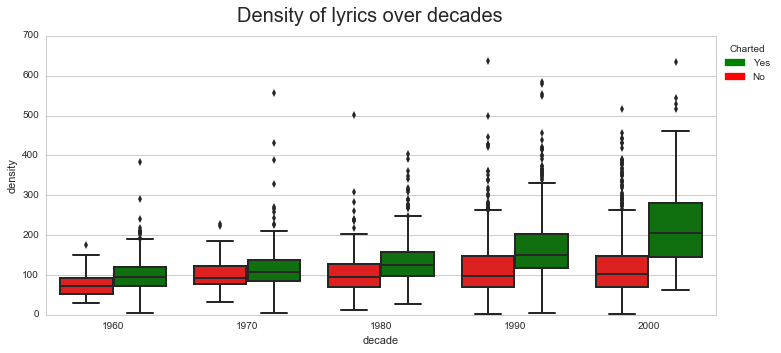

In [9]:
boxplotify(
    df, feature='density', path='densityXtime', title="Density of lyrics over decades"
)

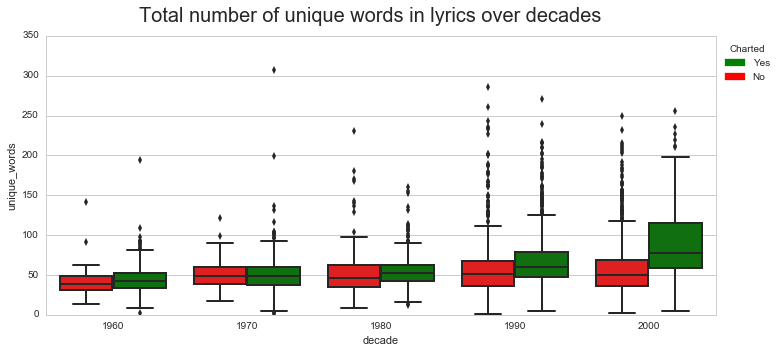

In [10]:
boxplotify(
    df, feature='unique_words', path='unique_wordsXtime', 
    title="Total number of unique words in lyrics over decades"
)

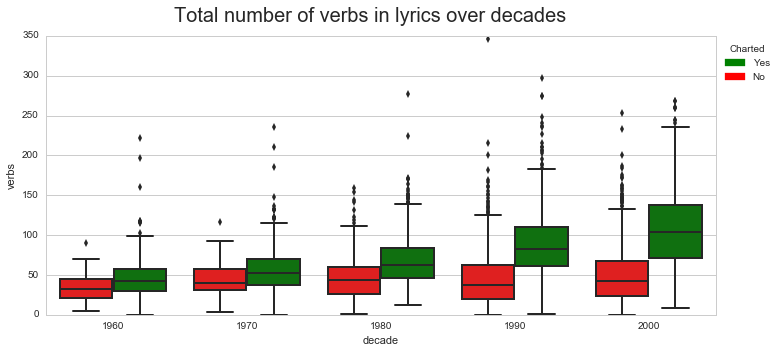

In [11]:
boxplotify(
    df, feature='verbs', path='verbsXtime', 
    title="Total number of verbs in lyrics over decades"
)

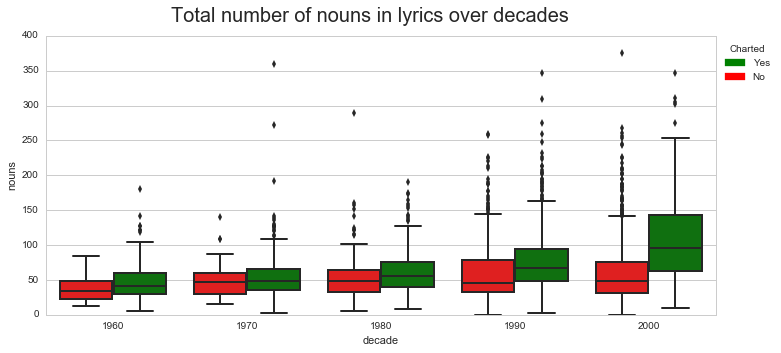

In [12]:
boxplotify(
    df, feature='nouns', path='nounsXtime', 
    title="Total number of nouns in lyrics over decades"
)

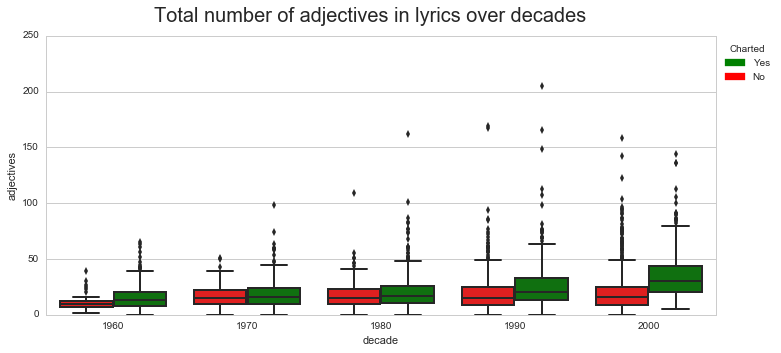

In [13]:
boxplotify(
    df, feature='adjectives', path='adjectivesXtime', 
    title="Total number of adjectives in lyrics over decades")

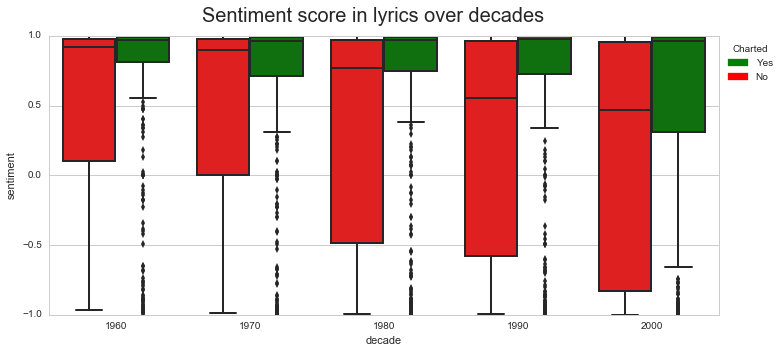

In [14]:
boxplotify(
    df, feature='sentiment', path='sentimentXtime', 
    title="Sentiment score in lyrics over decades"
)

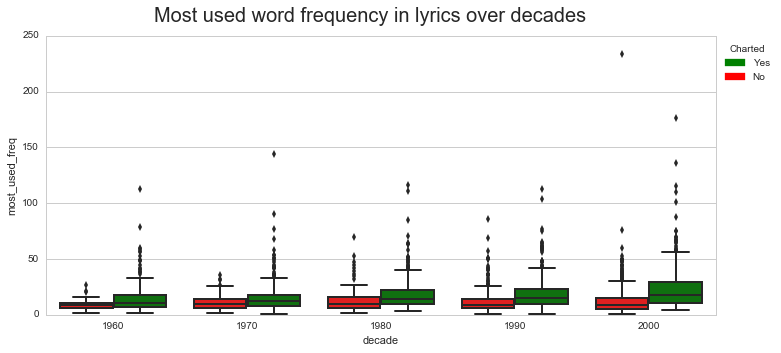

In [15]:
boxplotify(
    df, feature='most_used_freq', path='most_used_freqXtime', 
    title="Most used word frequency in lyrics over decades"
)

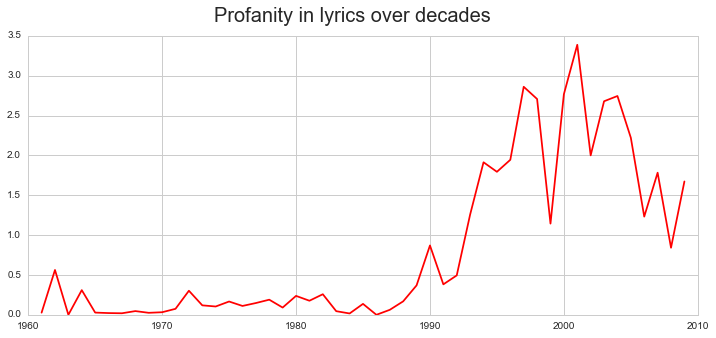

In [16]:
meanLine(
    df, feature='total_curses', path='profanityXtime', 
    title="Profanity in lyrics over decades"
)

# Use model to view the best feature over decades

In [17]:
df = initSet()

In [18]:
def bestFeat(decade, df):
    
    # Keep both year and decade
    df_byDecade = df[df['decade'] == decade]
    dropList = ['most_used_term', 'reading_score']
    removeList = ['charted', 'year', 'decade']

    df_byDecade, features = wrangle(df_byDecade, dropList, removeList, True)

    # set X and y and build model
    X = df_byDecade[features]
    y = df_byDecade['charted']

    # Create separate training and test sets with 60/40 train/test split
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=1000
    )

    # train model with classifier and parameter determined best
    clf = ensemble.RandomForestClassifier(
        n_estimators=256, min_samples_leaf=2, max_depth=8
    )
    clf.fit(X_train, y_train)
    
    # Plot importances for all features
    features = X.columns
    feature_importances = clf.feature_importances_

    features_df = DataFrame(
        {
            'Year': decade,
            'Features': features,
            'Importance Score': feature_importances
        }
    )

    features_df.sort_values(
        'Importance Score', inplace=True, ascending=False)

    return features_df.head(1)


In [19]:
newFrame = []

for decade in xrange(1960, 2010, 10):
    newFrame.append(bestFeat(decade, df))

newDf = concat(newFrame)

/home/sabbir/Desktop/Heat-Replay/src/assets/models/util/dfmgmt.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.drop(dropList, axis=1, inplace=True)


In [20]:
newDf = newDf[['Year', 'Features', 'Importance Score']]
newDf.reset_index(drop=True)

,Year,Features,Importance Score
0,1960,sentiment,0.124276
1,1970,sentiment,0.139255
2,1980,density_raw,0.164725
3,1990,verbs,0.205179
4,2000,verbs,0.191528


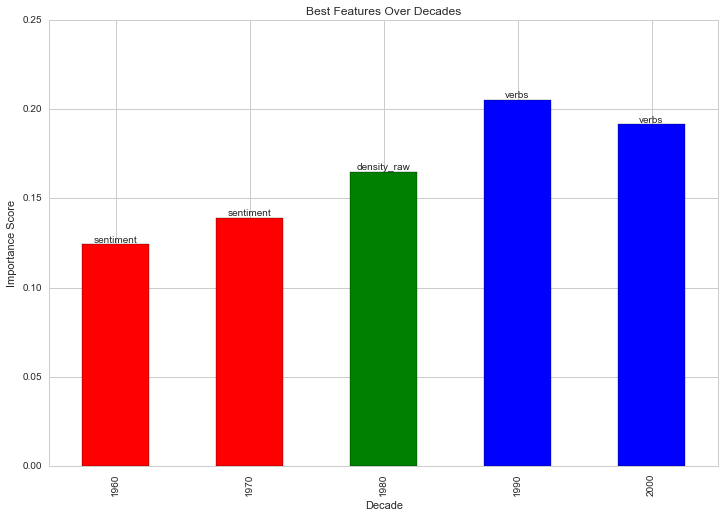

In [22]:
import matplotlib.pyplot as plt
from pandas import Series

freq_series = Series.from_array(newDf['Importance Score'])
plt.figure(figsize=(12, 8))

ax = freq_series.plot(kind='bar', color='rrgbb')
ax.set_title("Best Features Over Decades")
ax.set_xlabel("Decade")
ax.set_ylabel("Importance Score")

ax.set_xticklabels(newDf['Year'])

rects = ax.patches

# Now make some labels
labels = newDf['Features']
for rect, label in zip(rects, labels):
    ax.text(
        rect.get_x() + rect.get_width()/2, 
        rect.get_height(), label, 
        ha='center', va='bottom'
    )
